# **1. Motivación y audiencia**

**Motivación:**

- El dataset "supermarket_sales - Sheet1" extraído de Kaggle proporciona información histórica de ventas en tres sucursales de una empresa, durante tres meses, donde se incluyen las compras realizadas con detalles específicos como la ciudad (asociado a la sucursal), género, tipo de cliente, método de pago, líneas de producto, calificación del cliente (`Rating`), métricas financieras (`Total`, `cogs`, entre otros) y temporales (`Date`, `Time`) .

- La selección de esta base de datos se fundamentó en el interés en buscar identificar los factores que permitan predecir compras de un cliente de forma temporal. Estos insights son relevantes en un mercado competitivo, ya que permiten aumentar los ingresos mediante estrategias informadas.

**Audiencia:**

- Empresas de retail: Mejorar la experiencia del cliente y diseñar estrategias de marketing personalizadas.
- Gerentes y responsables logísticos: Generar optimizaciones en inventarios y en el personal de la empresa.
- Investigadores: Explorar patrones de comportamiento de consumo.
- Clientes finales: Indirectamente beneficiados, ya que las empresas podrían implementar estrategias más centradas en sus necesidades.

# **2. Planteamiento del problema**

**Relevancia e impacto esperado:**

La satisfacción del cliente no solo afecta las ventas a corto plazo, sino también la lealtad y la reputación de la empresa a largo plazo. Si se logra identificar los factores clave que predicen el `Total`, la empresa podrá tomar decisiones informadas para mejorar la experiencia del cliente y maximizar sus ingresos.

**Preguntas clave del negocio:**

1. ¿Se pueden predecir las ventas totales en función de las características del cliente y del entorno?

**Objetivo del análisis:**

Construir un modelo supervisado de regresión, que permita predecir la variable de las ventas, basado en las características de una transacción.

**Métricas de evaluación:**

- **Raíz del Error Cuadrático Medio (RMSE):** Valor aceptable entre 10% y 20% del valor promedio de la variable a predecir.
- **R² (Coeficiente de Determinación):** Valor aceptable a partir de 0.50.

# **3. Análisis Exploratorio de Datos (EDA)**

## 3.1 Recopilación de los datos

In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd
import datetime as dt

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga del archivo

# from google.colab import files
# files.upload()

df = pd.read_csv("supermarket_sales - Sheet1.csv")

## 3.2 Descripción de los datos

In [3]:
# Se visualizan algunas filas para exploración

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Se consulta la cantidad de filas y columnas del DataFrame

df.shape

(1000, 17)

In [5]:
# Se solicita información general del DataFrame: cantidad de filas y columnas, nulos por columna, tipo de dato de cada columna.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
# Se obtiene información acerca del DataFrame

round(df.describe(), 0)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,56.0,6.0,15.0,323.0,308.0,5.0,15.0,7.0
std,26.0,3.0,12.0,246.0,234.0,0.0,12.0,2.0
min,10.0,1.0,1.0,11.0,10.0,5.0,1.0,4.0
25%,33.0,3.0,6.0,124.0,118.0,5.0,6.0,6.0
50%,55.0,5.0,12.0,254.0,242.0,5.0,12.0,7.0
75%,78.0,8.0,22.0,471.0,449.0,5.0,22.0,8.0
max,100.0,10.0,50.0,1043.0,993.0,5.0,50.0,10.0


**RESUMEN - DATASET PARA EL PROYECTO:**

---

1.  La base de datos contiene 1000 registros y 17 variables, las cuales son (de acuerdo con información de Kaggle):
*   `Invoice ID`: Número de identificación de factura de comprobante de venta.
*   `Branch`: Sucursal del local comercial.
*   `City`: Ciudad donde se ubican los locales comerciales.
*   `Customer type`: Tipo de cliente.
*   `Gender`: Tipo de género del cliente.
*   `Product line`: Grupos de categorización de artículos comprados.
*   `Unit price`: Precio de cada producto comprado por el cliente.
*   `Quantity`: Número de productos comprados por el cliente.
*   `Tax 5%`: Tarifa de impuesto del 5% para la compra del cliente.
*   `Total`: Precio total incluyendo impuestos.
*   `Date`: Fecha de compra.
*   `Time`: Hora de compra.
*   `Payment`: Medio de pago utilizado por el cliente para la compra.
*   `cogs`: Costo de los bienes vendidos.
*   `gross margin percentage`: Porcentaje de margen bruto.
*   `gross income`: Ingresos brutos.
*   `Rating`: Calificación del cliente en su experiencia de compra general.

---

2.  Las variables se identifican como:
*   Variables categóricas / object:
    - `Invoice ID`, `Branch`, `City`, `Customer type`, `Gender`, `Product line`, `Payment`.
*   Variables numéricas:
    - `Unit price`, `Quantity`, `Tax 5%`, `Total`, `cogs`, `gross margin percentage`, `gross income`, `Rating`
  
*   Fechas y tiempo:
    - `Date`, `Time`
---

---
**ESTADÍSTICA DESCRIPTIVA:**

1.   **Variables Numéricas - General:**  En el análisis inicial, no se identifican valores anómalos que sugieran la presencia de datos erróneos. Particularmente, la ausencia de valores negativos en los mínimos indica que no existen devoluciones de compras, las cuales podrían manifestarse como valores negativos en los ingresos. Asimismo, esto sugiere que no hay parámetros ingresados incorrectamente con signo negativo, lo que refuerza la consistencia general de los datos numéricos.

2.  **`gross margin percentage`:** La variable presenta un valor constante de 5 (redondeado), en todo el conjunto de datos, lo que indica que no posee variabilidad. Dado que una variable constante no aporta información útil al modelo ni contribuye a la separación de los datos, su inclusión no mejora la capacidad del modelo para generalizar. Por este motivo, se considera su eliminación durante la etapa de preprocesamiento y selección de características.

3.   **`Quantity`:** La variable presenta un promedio de 6 productos, con un valor mínimo de 1 y un máximo de 10. Estos valores sugieren que la cantidad de productos por transacción está dentro de un rango acotado y razonable, sin presencia aparente de valores atípicos o inconsistencias.

4.   **`Unit price`:** La variable presenta un promedio de 56, con un valor mínimo de 10 y un máximo de 100. Estos valores indican que la distribución del precio unitario es coherente y no presenta valores atípicos evidentes en este rango.

5. **`Total`:** Este parámetro representa el precio total de los productos, incluyendo los impuestos. La variable presenta un promedio de 323, con un valor mínimo de 11 y un máximo de 1043.

6. **Relación enter `Tax 5%`, `cogs` y `Total`:** Se observa que la suma de las variables `Tax 5%` (impuesto aplicado) y `cogs` (costo de los bienes vendidos) da como resultado la variable `Total`, lo que conlleva a una relación lineal entre estas. Esta relación implica que las variables mencionadas son componentes directos del cálculo del valor total de las ventas, y, por lo tanto, no aportan información adicional independiente al modelo.

---

## 3.3 Análisis de la calidad de los datos

In [7]:
# Se calcula la cantidad de datos nulos en el DataFrame

conteo_nulos = df.isnull().sum()
conteo_nulos.index.name = "Variable"
conteo_nulos.name = "Conteo_Nulos"
print("\033[1;30m" "Cantidad de datos nulos por variable")
conteo_nulos

Cantidad de datos nulos por variable


,Conteo_Nulos
Variable,
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0


In [8]:
# Se calcula el número de registros duplicados (iguales para todas sus columnas) en el DataFrame

conteo_duplicados = df.duplicated().sum()
print("\033[1;30m" f"Cantidad de registros duplicados: {conteo_duplicados}")

Cantidad de registros duplicados: 0


In [9]:
# Se aplica una función para conocer la cantidad de duplicados en cada variable de forma individual

for i in df.columns:
  duplicados_por_variable = df.duplicated(subset=[i]).sum()
  print("\033[1;30m" f"Variable: {i}, Nº Duplicados: {duplicados_por_variable}")

Variable: Invoice ID, Nº Duplicados: 0
Variable: Branch, Nº Duplicados: 997
Variable: City, Nº Duplicados: 997
Variable: Customer type, Nº Duplicados: 998
Variable: Gender, Nº Duplicados: 998
Variable: Product line, Nº Duplicados: 994
Variable: Unit price, Nº Duplicados: 57
Variable: Quantity, Nº Duplicados: 990
Variable: Tax 5%, Nº Duplicados: 10
Variable: Total, Nº Duplicados: 10
Variable: Date, Nº Duplicados: 911
Variable: Time, Nº Duplicados: 494
Variable: Payment, Nº Duplicados: 997
Variable: cogs, Nº Duplicados: 10
Variable: gross margin percentage, Nº Duplicados: 999
Variable: gross income, Nº Duplicados: 10
Variable: Rating, Nº Duplicados: 939


In [10]:
# Revisión de valores únicos en columnas seleccionadas

for column in ["Branch", "City", "Customer type", "Gender", "Product line", "Quantity", "Payment", "Rating"]:
    print(f'\n\033[1;30mValores únicos en la columna "{column}":\033[0m')  # Comillas dobles usadas correctamente
    print(sorted(df[column].unique()))  # Ordena los valores únicos
    print(f"Total de valores únicos: {len(df[column].unique())}")


Valores únicos en la columna "Branch":
['A', 'B', 'C']
Total de valores únicos: 3

Valores únicos en la columna "City":
['Mandalay', 'Naypyitaw', 'Yangon']
Total de valores únicos: 3

Valores únicos en la columna "Customer type":
['Member', 'Normal']
Total de valores únicos: 2

Valores únicos en la columna "Gender":
['Female', 'Male']
Total de valores únicos: 2

Valores únicos en la columna "Product line":
['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']
Total de valores únicos: 6

Valores únicos en la columna "Quantity":
[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Total de valores únicos: 10

Valores únicos en la columna "Payment":
['Cash', 'Credit card', 'Ewallet']
Total de valores únicos: 3

Valores únicos en la columna "Rating":
[np.float64(4.0), np.float64(4.1), np.float64(4.2), np.float64(4.3), np.float64(4

**RESUMEN DE ANÁLISIS DE DUPLICADOS:**

1.   No se encontraron registros duplicados (iguales para todas sus columnas).

2. En la columna `Invoice ID` se observa que no hay facturas con número repetido.

3. En las columnas `Branch`, `City` , `Customer Type`, `Gender`, `Product Line`, `Quantity`, `Payment`, `Rating`, se verifica que la suma de valores duplicados más los valores únicos equivale al total de registros del conjunto de datos, y dado que en la consulta de los valores únicos de estas variables se presentan resultados coherentes, sin inconsistencias, se concluye que no existen duplicados erróneos en ninguna de estas columnas.

4. Se observa que las variables `Tax 5%`, `Total`, `cogs`, `gross income`, presentan 10 valores duplicados cada una, lo cual es congruente dado que existe una relación lineal entre ellas. Esta relación sugiere que los duplicados no son erróneos, luego del análisis de las columnas individuales.

**RESUMEN DE ANÁLISIS DE DATOS FALTANTES Y LIMPIEZA**

1. No se identificaron columnas con datos faltantes en el conjunto de datos, según la consulta realizada.

2. No se identificaron valores con incongruencias, errores tipográficos, categorías duplicadas con nombres diferentes, o parámetros anómalos en las variables analizadas. Las consultas realizadas confirman que los datos categóricos y numéricos presentan consistencia y calidad adecuada para el análisis posterior.

3. El DataFrame resultante, tras la verificación de datos faltantes y la aplicación de técnicas de limpieza, mantiene un total de 1000 registros y 17 variables. Esto indica que no fue necesario eliminar registros ni imputar valores, dado que los datos cumplen con los estándares de integridad y completitud requeridos para el análisis.

## 3.4 Estudio de la relacion entre variables

In [11]:
# Observacion de la relación entre las variables Branch y City:

# Tabla de contingencia entre City y Branch
contingency_table = pd.crosstab(df["City"], df["Branch"])
print(contingency_table)

Branch       A    B    C
City                    
Mandalay     0  332    0
Naypyitaw    0    0  328
Yangon     340    0    0


### Analisis univariado

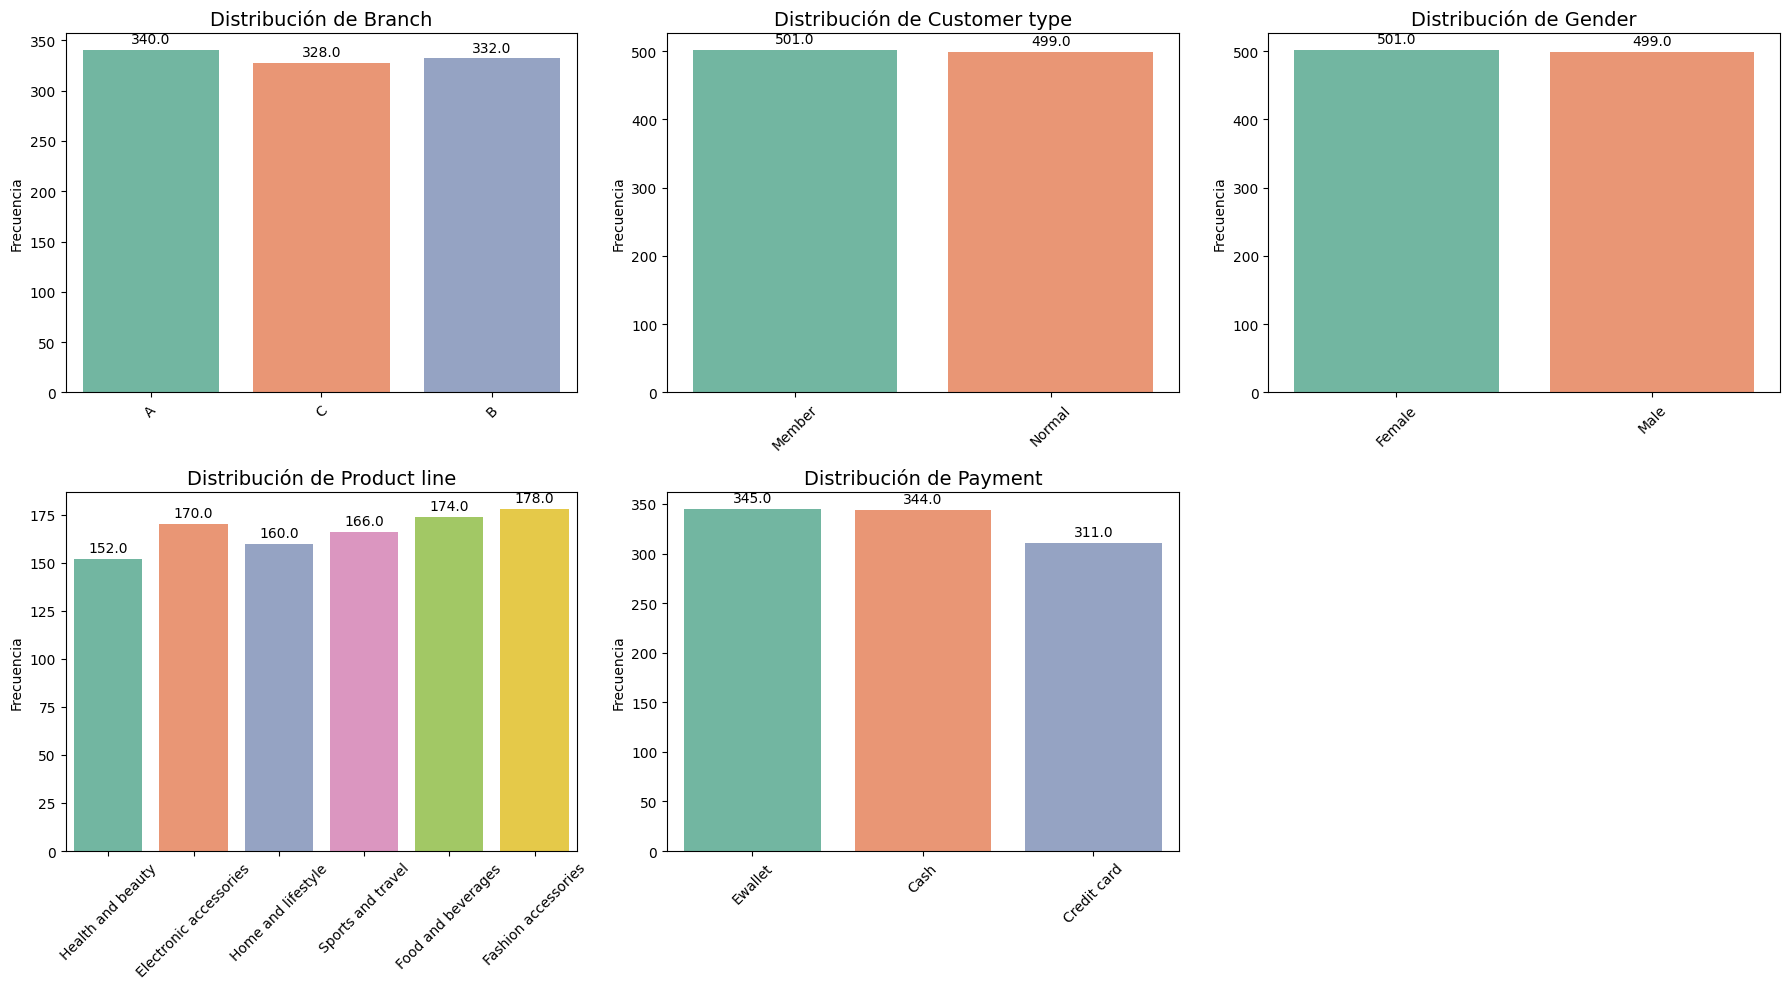

In [12]:
# Variables categóricas

cat_cols = ["Branch", "Customer type", "Gender", "Product line", "Payment"]

# Configuración de filas y columnas
n_cols = 3  # Número de gráficos por fila
n_rows = -(-len(cat_cols) // n_cols)  # Cálculo dinámico del número de filas

# Crear la figura y subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

# Crear gráficos de barras para cada columna categórica
for i, col in enumerate(cat_cols):
    ax = sns.countplot(x=col, hue=col, data=df, palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")

    # Añadir etiquetas de conteo encima de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha="center", va="baseline", fontsize=10, color="black", xytext=(0, 5),
                    textcoords="offset points")

    # Rotar las etiquetas del eje X
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si hay menos gráficos que subplots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Distribución de las variables categóricas:**

- `Branch`: La distribución de las sucursales es balanceada con valores de 340, 328 y 332 registros para las sucursales A, B y C, respectivamente.
- `Customer Type`: La categoría *Member* tiene 501 registros, mientras que *Normal* tiene 499, mostrando una distribución casi equitativa entre los tipos de cliente.
- `Gender`: La variable de género también presenta equilibrio, con 501 registros para *Female* y 499 para *Male*.
- `Product Line`: Se observan distribuciones ligeramente diferentes entre las categorías, siendo *Fashion Accessories* la más frecuente con 178 registros y *Health and Beauty* la menos frecuente con 152.
- `Payment`: Los métodos de pago *Ewallet* y *Cash* predominan con 345 y 344 registros, respectivamente, mientras que *Credit Card* presenta 311 registros.

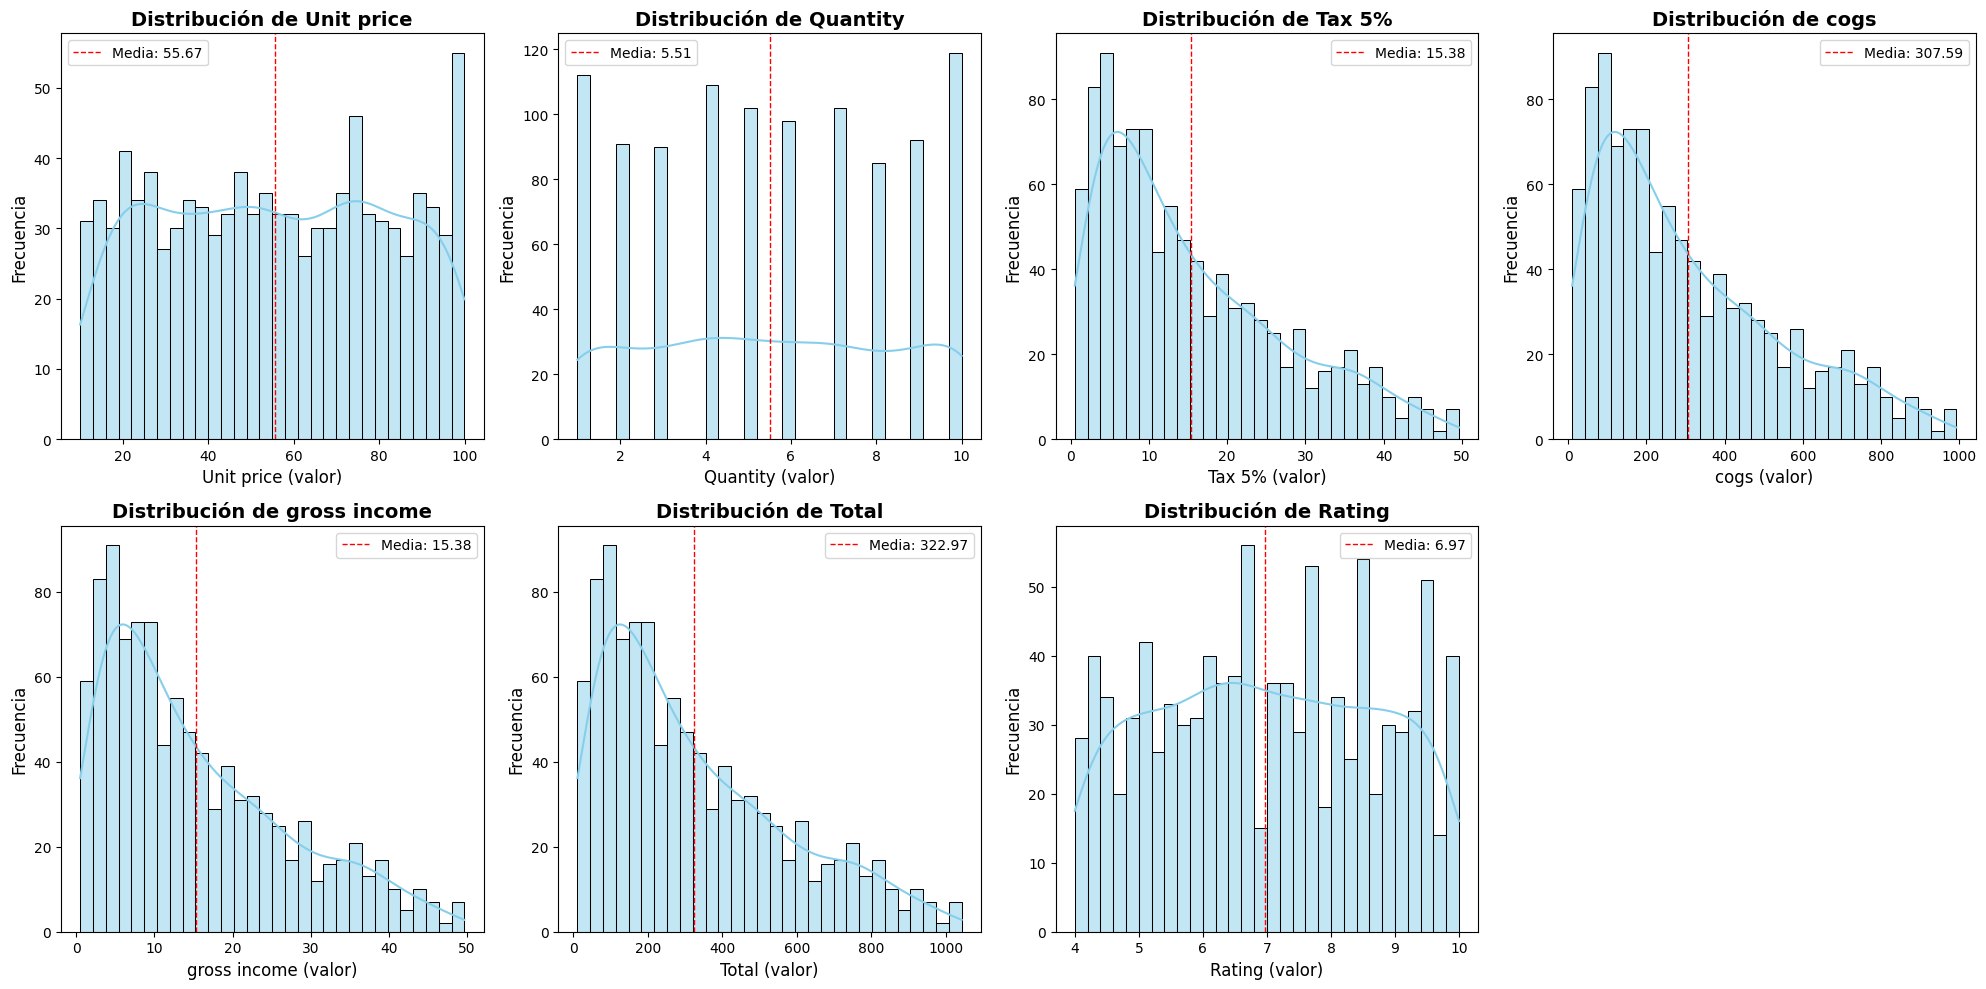

In [13]:
# Variables Numéricas

numerical_cols = ["Unit price", "Quantity", "Tax 5%", "cogs", "gross income", "Total", "Rating"]

# Configurar filas y columnas para los subplots
n_cols = 4  # Número de gráficos por fila
n_rows = -(-len(numerical_cols) // n_cols)  # Calcular el número de filas

# Crear la figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Iterar sobre cada columna numérica
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, color="skyblue", bins=30, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel(f"{col} (valor)", fontsize=12)
    axes[i].set_ylabel("Frecuencia", fontsize=12)
    axes[i].axvline(df[col].mean(), color="red", linestyle="dashed", linewidth=1, label=f"Media: {df[col].mean():.2f}")
    axes[i].legend()

# Eliminar ejes vacíos si hay menos gráficos que subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Distribución de variables numéricas**

1.  **`Unit Price`:** La variable tiene una distribución relativamente uniforme, y no se observan valores extremos ni sesgos claros.


2.  **`Quantity`:** La distribución es homogénea, la frecuencia de los valores es uniforme, lo cual indica un patrón predecible en las compras.

3.  **`Tax 5%`, `cogs`, `gross income` y `Total`:** Estas variables tienen distribuciones similares, sesgadas a la izquierda (mayoría de valores bajos).

4. **`Rating`:** Distribución uniforme entre 4 y 10, con una media cercana a 7.
La frecuencia parece equilibrada, sin valores extremos.

### Analisis multivariado

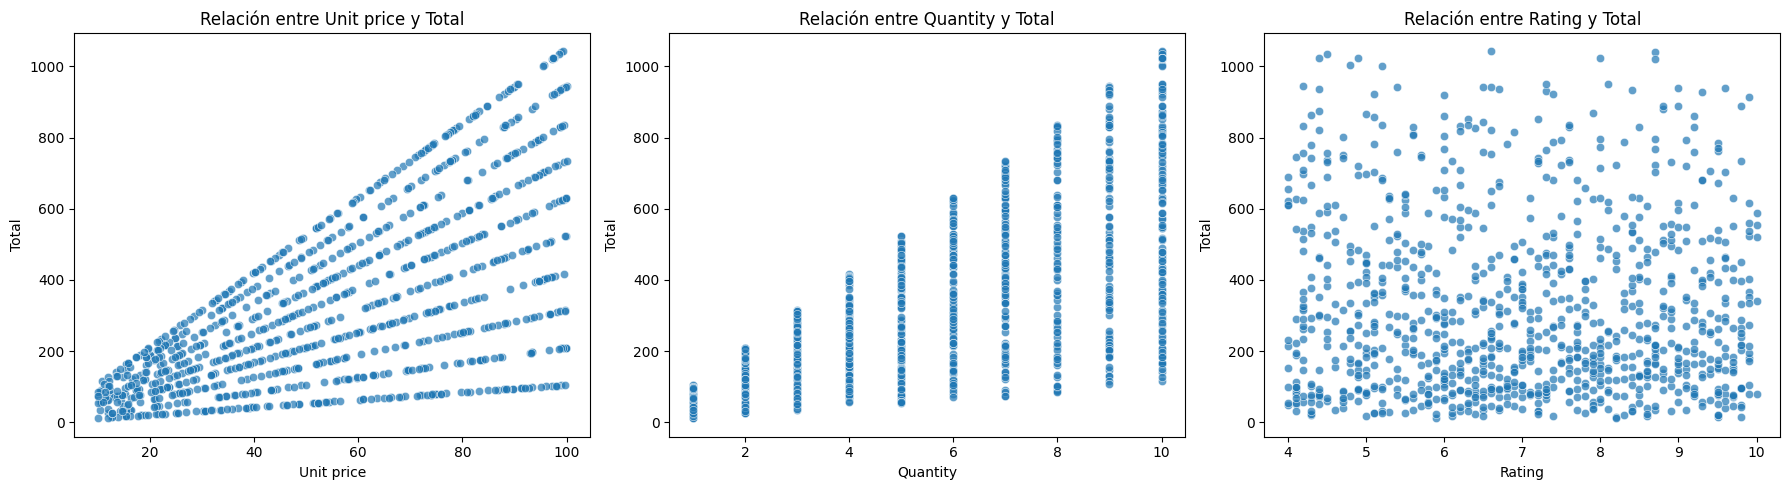

In [14]:
# Gráficos de dispersión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables = ["Unit price", "Quantity", "Rating"]
for i, var in enumerate(variables):
    sns.scatterplot(data=df, x=var, y="Total", ax=axes[i], alpha=0.7)
    axes[i].set_title(f"Relación entre {var} y Total")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Total")

plt.tight_layout()
plt.show()


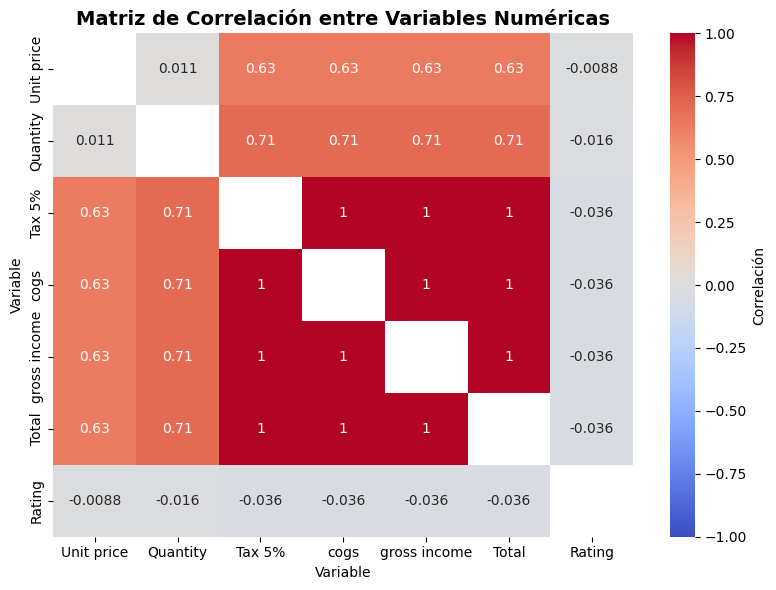

In [15]:
# Matriz de correlación

numerical_cols_filtered = [col for col in numerical_cols if col != "gross margin percentage"]
correlation_matrix = df[numerical_cols_filtered].corr()

# Configuración para ocultar la diagonal
mask = np.eye(correlation_matrix.shape[0], dtype=bool)
correlation_matrix_no_diag = correlation_matrix.mask(mask)

# Visualización del heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_no_diag, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask, cbar_kws={"label": "Correlación"})
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**Análisis de gráficos de dispersión y de la Matriz de Correlación:**

1.  **Relacion entre `Unit price` y `Total`:** Se observa una fuerte relación lineal, lo que es coherente con el cálculo de ingresos en función del precio unitario y la cantidad.

2. **Relación entre `Quantity` y `Total`:** Tienen una relación fuerte y directa, consistente con la fórmula de cálculo del monto de la compra.

3. **`Rating` independiente:** La variable `Rating` aparenta ser independiente, lo que significa que su relación con las otras variables numéricas es débil o inexistente.

4. **Redundancia en variables:** Las variables `Tax 5%`, `cogs`, `gross income` y `Total` están fuertemente correlacionadas (valor de 1), lo que reafirma que una de ellas puede ser retenida en el modelo y el resto eliminadas para evitar multicolinealidad.

5. **Influencia de `Quantity` y `Unit price`:** La cantidad de productos está moderadamente correlacionada con las variables relacionadas a ingresos, lo cual es lo esperado en término de las ventas.

6. **Correlacion entre `Quantity` y `Unit price`:** Tienen correlación cercana a 0.01, lo que indica que no hay relación lineal directa entre ellas.



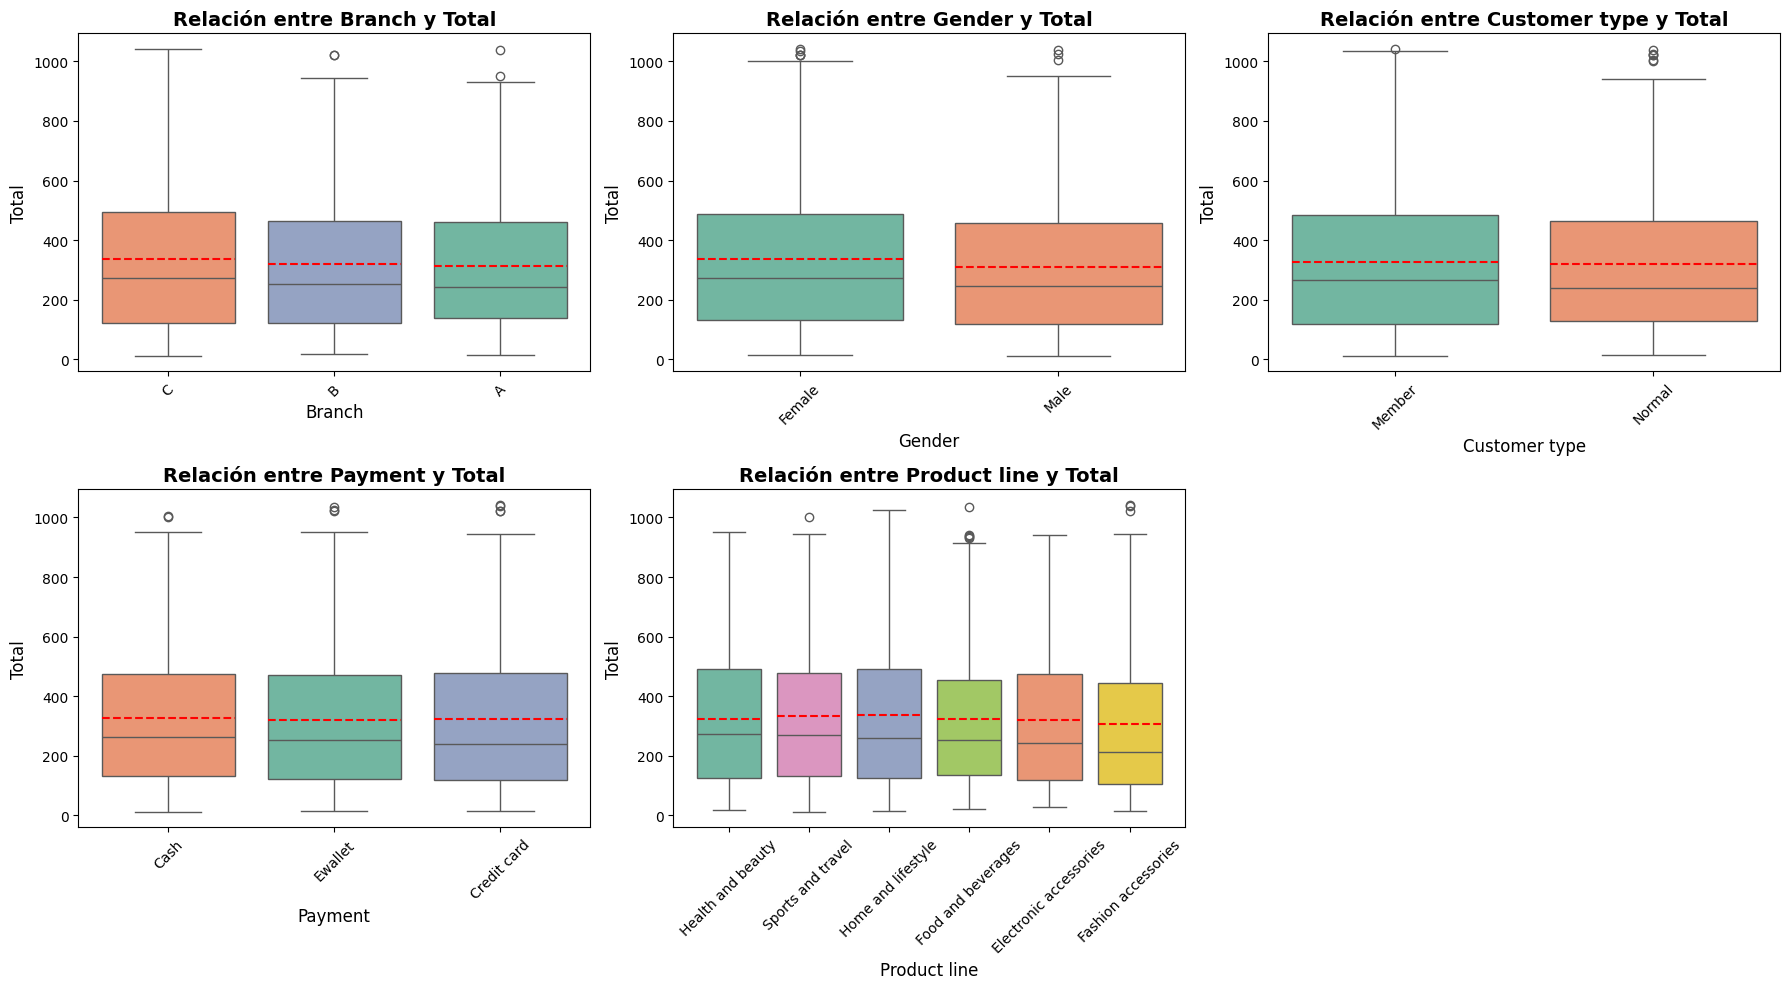

In [16]:
# Relación entre variables categóricas y la variable Total

categorical_cols = ["Branch", 'Gender', 'Customer type', 'Payment', 'Product line']

# Configuración de subplots
n_cols = 3  # Número de gráficos por fila
n_rows = -(-len(categorical_cols) // n_cols)  # Calcular filas dinámicamente
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Crear boxplots
for i, col in enumerate(categorical_cols):
    # Calcular orden de categorías por mediana
    order = df.groupby(col)["Total"].median().sort_values(ascending=False).index

    # Boxplot con orden específico y línea de media
    sns.boxplot(x=col, y="Total", data=df, order=order, hue=col, palette="Set2", legend=False, ax=axes[i])

    # Añadir línea de media en cada categoría
    means = df.groupby(col)["Total"].mean()
    for j, mean in enumerate(means[order]):
        axes[i].hlines(y=mean, xmin=j-0.4, xmax=j+0.4, colors='red', linestyles="dashed",
                       label="Media" if j == 0 else "")

    # Configuración de títulos y etiquetas
    axes[i].set_title(f"Relación entre {col} y Total", fontsize=14, fontweight="bold")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Total", fontsize=12)
    axes[i].tick_params(axis="x", rotation=45)

# Eliminar ejes vacíos si hay menos gráficos que subplots
for k in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

**ANÁLISIS DE BOXPLOTS:**

1.  **Relación entre `Branch` y `Total`:** No hay grandes diferencias en el comportamiento de ventas (`Total`), entre los locales comerciales.

2.  **Relación entre `Gender` y `Total`:** Si bien se observa una ligera dispersión más amplia en *Female*, los géneros tienen distribuciones similares. La variable parece no tener un impacto relevante en el valor total de compras.

3.  **Relación entre `Customer type` y `Total`:** Ser *Member* o cliente *Normal*, aparenta no tener una influencia destacada en el total de compras.

4.  **Relación entre `Payment` y `Total`:** Los métodos de pago muestran distribuciones similares, lo que permite inferir que no deberia haber influencia significativa en el total de compras.

5.  **Relación entre `Product Line` y `Total`:** Existen ligeras diferencias en las distribuciones entre las líneas de productos. La línea de productos *Home and lifestyle* parece generar compras de mayor valor.

6. **Detección de Outliers:** Se pueden observar outliers en cada una de las categorías de las variables categóricas respecto a la variable Total. Esto requiere considerar su eliminación, o en su defecto, la manipulación de datos que permita obtener resultados no sesgados por su presencia.

## 3.5 Conclusiones:

**Resumen General:**
- No se observan grandes diferencias en `Total` por sucursal, género o método de pago.
- La membresía (`Customer type`) tampoco tiene un impacto significativo.
- La línea de productos presenta ligeras diferencias, destacando Home and lifestyle y Sports and travel como categorías con mayores valores de Total.

**Variables categóricas:**
- La mayoría están balanceadas (`Branch`, `Customer type`, `Gender`), excepto `Product line` y `Payment`, donde hay pequeñas diferencias.

**Variables numéricas::**
- Se observa una coherencia en las distribuciones.
- `Tax 5%`, `cogs`, `gross income` y `Total` tienen relaciones lineales entre sí, lo que confirma su interdependencia.

**Variable target - `Total`:**
- La mediana se encuentra desplazada hacia valores bajos.
- Existe una cola extendida hacia la derecha, lo que confirma la presencia de valores extremos (outliers).
- La variabilidad de los datos es alta y asimétrica, lo que puede dificultar que los modelos lineales capturen correctamente la relación.
- No hay tiene muchas relaciones lineales marcadas con respecto al resto de las variables, las que presentan relaciones más importantes son el precio unitario y la cantidad.

**Tratamiento de Outliers:**
- Se decide retener los outliers, considerandose que son valores legítimos que reflejan la realidad de los datos, sin embargo, se aplicará transformación de la variable Total, mediante logaritmo, lo que permitirá reducir la amplitud de la escala y el impacto de los outliers extremos. También se considera la aplicación de modelos como Random Forest y XGBoost, que son robustos ante outliers (en comparación con modelos lineales).

**Inputs para la ingenieria de datos:**
- Se decide aplicar una transformación logarítmica a la variable `Total` con el objetivo de suavizar la influencia de los outliers observados en el análisis exploratorio. Esto permitirá que la distribución de los datos sea más simétrica y facilitará la tarea de los modelos predictivos.
- La variable `City` será eliminada, dado que su información es redundante respecto a la variable `Branch`. Al no aportar información adicional, su presencia en el modelo resulta innecesaria y podría generar colinealidad.
- Se considera la eliminación de las variables `Tax 5%`, `cogs` y `gross income`
 por su relación lineal directa con `Total`. Mantenerlas en el modelo generaría duplicación de información y afectaría negativamente la capacidad de generalización del modelo.
 - Se realizará un análisis detallado de las variables temporales `Date` y `Time`, las cuales serán consideradas durante la ingeniería de atributos.



# **4. Ingeniería de atributos**

## 4.1 Ajustes en tipo de dato y manipulación de variables

In [17]:
# Convertir la columna 'Date' a fecha y hora

df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y')
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M').dt.time
df["Year"] = df["Date"].dt.year
df["DayofWeek"] = df["Date"].dt.day_name()


# Clasificar franjas horarias
def classify_time(time):
    if time >= dt.time(5, 0) and time < dt.time(12, 0):
        return "Morning"
    elif time >= dt.time(12, 0) and time < dt.time(17, 0):
        return "Afternoon"
    else:
        return "Evening"

# Creación de la variable Time Range (mañana, tarde, noche) y Day of Week (Día de la semana)
df["TimeRange"] = df["Time"].apply(classify_time)

# Agrupar por día de la semana y calcular las ventas totales
sales_by_day = df.groupby('DayofWeek')['Total'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Agrupar por rango horario y sumar las ventas totales
sales_by_timerange = df.groupby('TimeRange')['Total'].sum()

# Se observa si los datos corresponden a un único año
df["Year"].unique()

array([2019], dtype=int32)

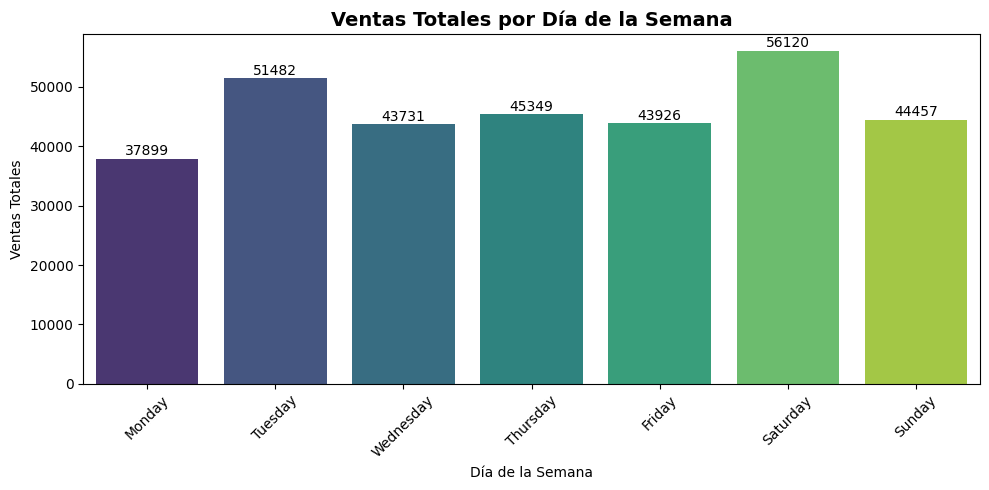

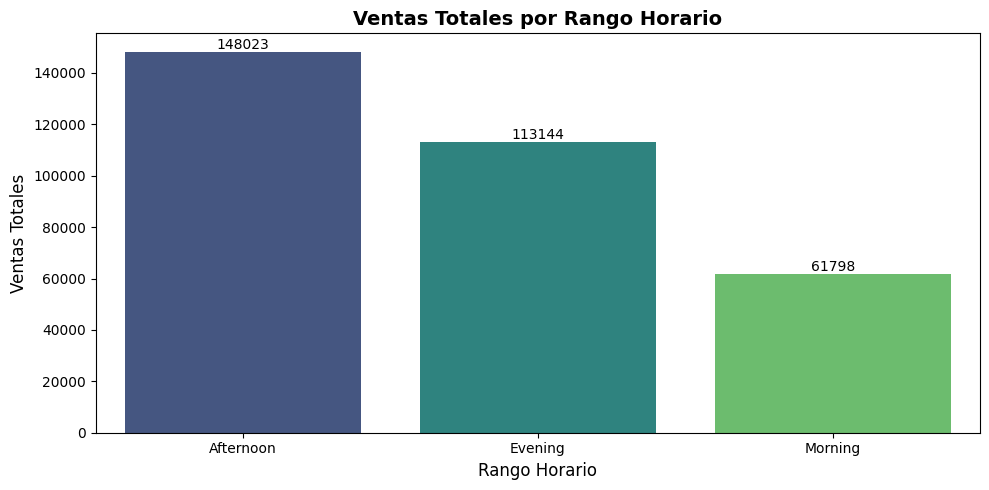

In [18]:
# Ventas Totales por Día de la Semana
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, hue=sales_by_day.index,
            palette="viridis", legend=False)
plt.title("Ventas Totales por Día de la Semana", fontsize=14, fontweight="bold")
plt.ylabel("Ventas Totales")
plt.xlabel("Día de la Semana")
plt.xticks(rotation=45)

# Añadir etiquetas a las barras
for i, val in enumerate(sales_by_day.values):
    plt.text(i, val + 50, f"{int(val)}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

# Ventas Totales por Rango Horario
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_timerange.index, y=sales_by_timerange.values,
            hue=sales_by_timerange.index, palette="viridis", legend=False)

# Títulos y etiquetas
plt.title("Ventas Totales por Rango Horario", fontsize=14, fontweight="bold")
plt.ylabel("Ventas Totales", fontsize=12)
plt.xlabel("Rango Horario", fontsize=12)
plt.xticks(rotation=0)

# Añadir etiquetas de valores a las barras
for i, val in enumerate(sales_by_timerange.values):
    plt.text(i, val + 50, f"{int(val)}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

**OBSERVACIONES TEMPORALES RESPECTO A LAS COMPRAS:**

- **Día de la Semana:** Se observa que el sábado tiene la mayor cantidad de ventas totales, seguido del martes. El lunes tiene las ventas más bajas.
- **Ventas más altas el sábado:** Esto sugiere que los clientes aprovechan los fines de semana para realizar compras.
- **Rango Horario:** La franja horaria de la tarde domina las ventas, seguida por la noche, mientras que la mañana tiene la menor cantidad de ventas.
- **Pico en la tarde:** Los clientes parecen realizar más compras en la franja horaria Afternoon (mediodía hasta las 5 p.m.).
- **Eliminación de la variable `Year`:** Tras analizar la variable `Year`, se observa que todos los registros corresponden al año 2019. Al ser una variable constante, no aporta información útil ni variabilidad al análisis ni a los modelos predictivos. Por lo tanto, se decide eliminar la variable `Year` del conjunto de datos, ya que no tendrá impacto en el desempeño del análisis posterior..

## 4.2 Preparación de los datos

### 4.2.1 Selección de variables

In [19]:
# Se ajusta el DataFrame, renombrandolo para Machine Learning (df_ml), y se eliminan las variables que no se utilizarán en el análisis

df_ml = df[["Branch", "Customer type", "Gender", "Product line", "Quantity", "Payment", "Rating", "DayofWeek", "TimeRange"]].copy()

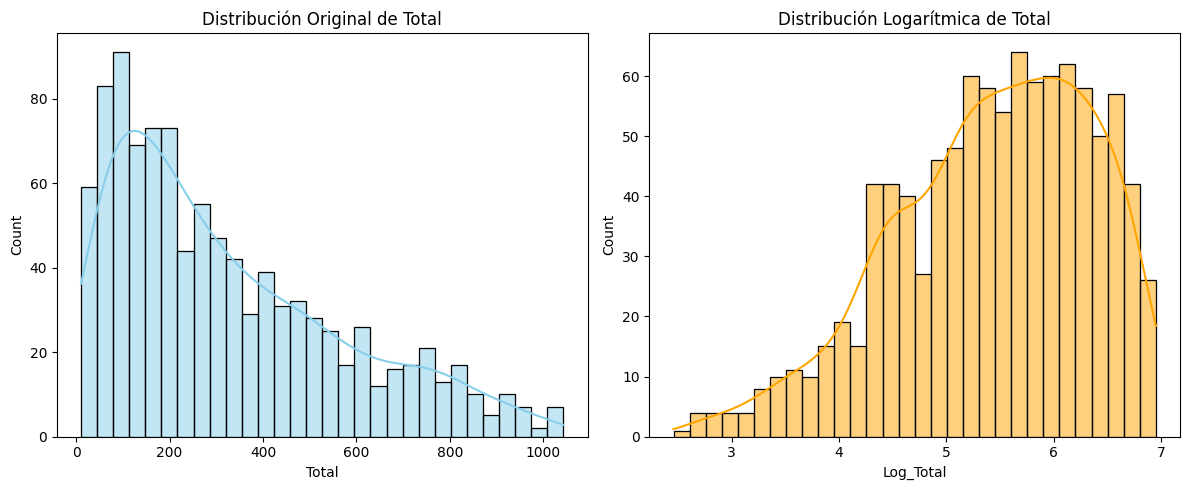

In [20]:
# Dado que la distribución de Total es sesgada (asimetria y con outliers), se aplica Transformación Logaritmica

# Aplicar transformación logarítmica
df_ml["Log_Total"] = np.log1p(df["Total"])

# Comparar distribuciones: Total vs Log_Total
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribución original
sns.histplot(df["Total"], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Distribución Original de Total")

# Distribución logarítmica
sns.histplot(df_ml["Log_Total"], bins=30, kde=True, color="orange", ax=axes[1])
axes[1].set_title("Distribución Logarítmica de Total")

plt.tight_layout()
plt.show()

**Distribución Logarítmica de la variable `Total`:**

La transformación logarítmica aplicada a la variable Total ha logrado los siguientes beneficios:

1. **Reducción de la asimetría:** La distribución, que originalmente era asimétrica hacia la derecha (positivamente sesgada), ahora presenta una forma más simétrica y cercana a la normal (aunque aun algo lejana).

2.  **Estabilización de la varianza:** La transformación reduce la dispersión de los valores extremos (outliers), logrando una concentración más uniforme de los datos.

3. **Reducción del impacto de outliers:** Los valores extremos, que previamente dominaban la distribución, tienen ahora un menor peso, facilitando el análisis y la interpretación de los resultados.

4.  **Mejora en el ajuste de modelos lineales:** La aproximación a una distribución normal es un requisito clave para muchos modelos estadísticos y algoritmos de aprendizaje automático, como regresiones lineales. La transformación mejora el ajuste del modelo y su capacidad de generalización. Aunque en la aplicación de los modelos se revisará si ha sido suficiente la transformación.

In [21]:
# Conversion de las columnas categóricas al tipo de dato category

categorical_columns = ['Branch', 'Customer type', 'Gender', 'Product line', 'Payment', 'TimeRange', 'DayofWeek']
for col in categorical_columns:
    df_ml[col] = df_ml[col].astype('category')

In [22]:
# Verificar las modificaciones realizadas
df_ml.info()
df_ml.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Branch         1000 non-null   category
 1   Customer type  1000 non-null   category
 2   Gender         1000 non-null   category
 3   Product line   1000 non-null   category
 4   Quantity       1000 non-null   int64   
 5   Payment        1000 non-null   category
 6   Rating         1000 non-null   float64 
 7   DayofWeek      1000 non-null   category
 8   TimeRange      1000 non-null   category
 9   Log_Total      1000 non-null   float64 
dtypes: category(7), float64(2), int64(1)
memory usage: 31.6 KB


Variable,Branch,Customer type,Gender,Product line,Quantity,Payment,Rating,DayofWeek,TimeRange,Log_Total
0,A,Member,Female,Health and beauty,7,Ewallet,9.1,Saturday,Afternoon,6.309866
1,C,Normal,Female,Electronic accessories,5,Cash,9.6,Friday,Morning,4.397162
2,A,Normal,Male,Home and lifestyle,7,Credit card,7.4,Sunday,Afternoon,5.833422
3,A,Member,Male,Health and beauty,8,Ewallet,8.4,Sunday,Evening,6.194503
4,A,Normal,Male,Sports and travel,7,Ewallet,5.3,Friday,Morning,6.454221


**VARIABLES INICIALES NO CONSIDERADAS EN EL DATAFRAME df_ml:**

*   `Invoice ID`: Es un identificador único para cada factura, que no influye en el análisis.
*   `City`: Dado que cada local comercial se asocia a una ciudad, esta variable no influye en el análisis.
*   `Unit price`: Esta variable se elimina dado que está directamente relacionada con la variable Total y no aporta información adicional (y su transformación logarítmica).
*   `Tax 5%`:  Esta variable se elimina dado que está directamente relacionada con la variable Total y no aporta información adicional (y su transformación logarítmica).
*   `Total`: Esta variable se elimina, dado que se cambió el target a su transformación logarítmica (`Log_Total`).
*  `Date`: Dado que se agregaron las variables year, month y day, no es necesario esta variable para un posible análisis de tendencias temporales.
*   `Time`: Dado que se agregó la variable Time Range, eliminar esta columna original es apropiado, ya que la nueva variable categórica condensa la información útil.
*   `cogs`:  Esta variable se elimina dado que está directamente relacionada con la variable Total y no aporta información adicional (y su transformación logarítmica).
*   `gross margin percentage`:   La variable presenta un valor constante en todo el conjunto de datos y no aporta información útil al modelo.
*   `gross income`:  Esta variable se elimina dado que está directamente relacionada con la variable Total y no aporta información adicional (y su transformación logarítmica).

**VARIABLES QUE SE ADICIONAN PARA EL DATAFRAME df_ml:**

*   `DayofWeek`: Representa los días de la semana en los que se realizan las compras. Esta variable permite analizar patrones temporales y tendencias en función del día, identificando los días más activos en términos de volumen de compras.

*   `TimeRange`: Indica las franjas horarias en las que se realizan las compras, categorizadas como *Morning*, *Afternoon*, y *Evening*. Esta variable es útil para evaluar cómo varían las ventas según la hora del día.

*   `Log_Total`: Nueva variable objetivo (target) que representa la transformación logarítmica de las ventas totales (`Total`).

In [23]:
# categorical_feature_names_binary = ['Customer type', 'Gender']
# categorical_feature_names_multiple = ['Product line', 'Payment', 'Branch', 'TimeRange', 'DayofWeek']

### 4.2.2 Escalamiento de variables numéricas

In [24]:
# Identificación de las columnas numéricas excluyendo la variable objetivo 'Log_Total'
numeric_feature_names = ['Quantity', 'Rating']

**NOTA:** En el script actual, la variable objetivo `Log_Total` no se escala deliberadamente. Esto se debe a que el modelo de regresión utilizado deberia poder manejar directamente los valores obtenidos, sin requerir de otra transformación previa.

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Aplicar normalización
scaler = MinMaxScaler()
df_ml[numeric_feature_names] = scaler.fit_transform(df_ml[numeric_feature_names])

### 4.2.3 Manipulación de variables categoricas

In [26]:
# Aplicación de Binarizer para las variables categóricas binarias

from sklearn.preprocessing import LabelBinarizer

# Inicializar el codificador binario
lb = LabelBinarizer()
df_ml["Customer type"] = lb.fit_transform(df_ml["Customer type"])
df_ml["Gender"] = lb.fit_transform(df_ml["Gender"])

In [27]:
# Aplicación de get_dummies para las variables categóricas múltiples
df_ml = pd.get_dummies(df_ml, columns=["Branch", "Product line", "Payment", "DayofWeek", "TimeRange"], drop_first=True, dtype=int)

In [28]:
# Verificación del resultado
df_ml.head()

,Customer type,Gender,Quantity,Rating,Log_Total,Branch_B,Branch_C,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,...,Payment_Credit card,Payment_Ewallet,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,TimeRange_Evening,TimeRange_Morning
0,0,0,0.666667,0.850000,6.309866,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,0,0.444444,0.933333,4.397162,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0.666667,0.566667,5.833422,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,1,0.777778,0.733333,6.194503,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,1,0.666667,0.216667,6.454221,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# **5. Entrenamiento y testeo de modelos**

Se van a aplicar los siguientes modelos:
1. Regresión Lasso
2. Random Forest
3. XGBoost

**Justificación de la Elección:**
1.  Regresión Lasso:
- Este modelo lineal incluye una penalización L1, lo que permite realizar una selección automática de características al asignar coeficientes cercanos a cero a las variables menos relevantes.
- Es ideal para problemas donde algunas características podrían no ser útiles, ayudando a simplificar el modelo y evitar el sobreajuste.

2. Random Forest:
- Este modelo está basado en el ensamble de árboles de decisión, capaz de manejar relaciones no lineales y capturar interacciones entre las características.
- Su capacidad de trabajar con datos complejos y no lineales lo hace robusto frente a ruido y outliers.

3.  XGBoost:

- Este modelo de boosting basado en árboles, es diseñado para manejar datos complejos de manera eficiente.
- Es útil para capturar relaciones complejas entre las variables.

La elección de estos tres modelos busca observar la diversidad en enfoque, y evaluar el desempeño de modelos simples frente a modelos más complejos en términos de precisión y generalización.


## 5.1 Carga de Librerias y Division de los datos en test y train

In [29]:
# Carga de librerias

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import itertools

# Separar variables predictoras (X) y variable objetivo (y)
X = df_ml.drop(["Log_Total"], axis=1)
y = df_ml["Log_Total"]

In [30]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 21), (200, 21), (800,), (200,))

## 5.2 Modelo 1 - Regresión Lasso

In [31]:
lasso = Lasso(alpha=0.01) # Se probó internamente con varios valores de alpha (0.01, 0.1 y 1) y se consideró el que mejor performó
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n\tMSE: {mse:.2f}\n\tRMSE: {rmse:.2f}\n\tR2 Score: {r2:.2f}\n")

evaluate_model(y_test, y_pred_lasso, "Regresión Lasso")

Regresión Lasso:
	MSE: 0.41
	RMSE: 0.64
	R2 Score: 0.52



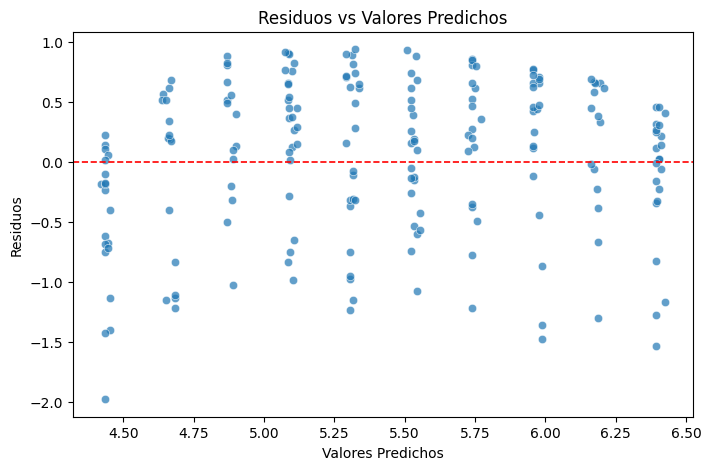

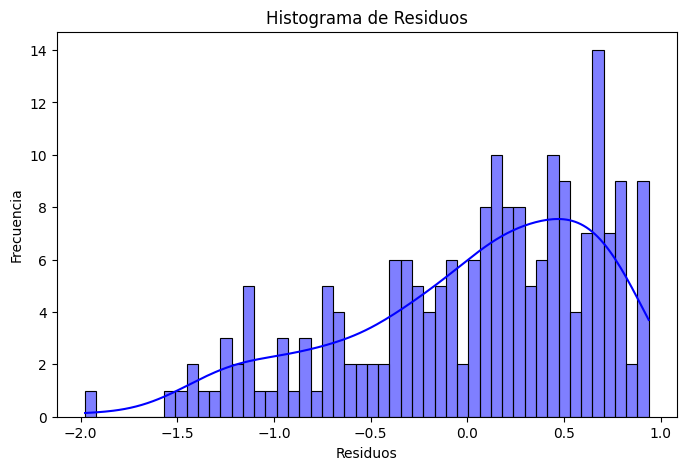

In [32]:
# Chequeo de Linealidad, Normalidad y Heterocedasticidad
residuals = y_test - y_pred_lasso

# Gráfico de residuos vs valores predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_lasso, y=residuals, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.2)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Predichos")
plt.show()

# Histograma de residuos (verificación de normalidad)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True, color="blue")
plt.title("Histograma de Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

1. **Gráfico de Residuos vs Valores Predichos**
- El gráfico muestra la distribución de los residuos con respecto a los valores predichos.
- Idealmente, los residuos deberían estar distribuidos aleatoriamente alrededor de la línea roja (y=0) sin ningún patrón aparente. Sin embargo, se observa que los residuos no son completamente aleatorios, y hay una ligera acumulación por encima de la línea roja en un patrón vertical, lo que sugiere que la relación lineal asumida por Lasso no seria válida completamente.
- Es probable que existan relaciones no lineales entre las variables predictoras y la variable objetivo.
- También hay dispersión desigual en los residuos a lo largo del eje X, lo que indica posibles problemas de heterocedasticidad.

2. **Histograma de Residuos**
- El histograma de residuos debería aproximarse a una distribución normal centrada en cero. La curva azul (KDE)  da una idea de la forma de la distribución.
- Los residuos no tienen una distribución normal, dado que la curva muestra asimetría hacia la izquierda y una concentración irregular en torno a cero y valores positivos.
- La falta de normalidad en los residuos es otro indicador de que el modelo lineal de Lasso no se ajusta completamente a los datos.
- Se interpreta que las transformaciones logarítmicas mejoraron parcialmente el ajuste, pero no eliminaron todas las irregularidades.


3.  **Conclusión:**
- La regresión Lasso no captura adecuadamente la estructura de los datos, lo que sugiere que un modelo más complejo (como los modelos Random Forest y XGBoost a aplicar), podría manejar mejor las no linealidades y variaciones en los datos.

## 5.3 Modelo 2 - Random Forest

In [33]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest:
	MSE: 0.41
	RMSE: 0.64
	R2 Score: 0.53



## 5.4 Modelo 3 - XGBoost

In [34]:
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost")

XGBoost:
	MSE: 0.49
	RMSE: 0.70
	R2 Score: 0.44



## 5.5 Resultados

In [35]:
# Evaluar y almacenar los resultados
results = []

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results.append({'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2})

# Evaluar modelos existentes
evaluate_model(y_test, y_pred_lasso, 'Regresion Lasso')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

# Mostrar comparación de modelos
results_df = pd.DataFrame(results)
print("Comparación de Modelos:")
print(results_df)

Comparación de Modelos:
             Model       MSE      RMSE  R2 Score
0  Regresion Lasso  0.413250  0.642845  0.524979
1    Random Forest  0.406908  0.637894  0.532269
2          XGBoost  0.489053  0.699323  0.437845


**Análisis de resultados:**
1. **Error Cuadrático Medio (MSE):**
- Lasso y Random Forest obtienen el mismo MSE (0.41), lo que indica un rendimiento similar en términos de error promedio cuadrático.
- XGBoost tiene un MSE más alto (0.49), lo que sugiere que es menos preciso para predecir los valores en este conjunto de datos (se verá posteriormente si la optimización de parámetros mejora las métricas).

2.  **Raíz del Error Cuadrático Medio (RMSE):**
- Lasso y Random Forest nuevamente muestran el mismo RMSE (0.64), confirmando su rendimiento comparable.
- XGBoost tiene un RMSE mayor (0.70), indicando predicciones más alejadas de los valores reales.

3.  **R² Score:**
- Random Forest tiene el mejor R² (0.53), lo que significa que explica la mayor proporción de la varianza en los datos.
- Lasso tiene un R² ligeramente menor (0.52), pero sigue siendo competitivo, aunque no se cumplen con las condiciones de regresión lineal revisadas.
- XGBoost tiene el menor R² (0.44), lo que sugiere que no captura tan bien la estructura de los datos.

4.  **Resolución:**
- Se aplicará ajsute de hiperparámetros a los modelos de Random Forest y XGBoost para explorar si es posible mejorar el rendimiento y consecuentemente las métricas evaluadas.
- La optimización debería confirmar si Random Forest mantiene su rendimiento como modelo preferido o seleccionado, o si XGBoost mejora significativamente con ajustes específicos.

# **6. Optimización de hiperparámetros**

In [36]:
# Optimización de Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Mejor modelo y predicciones
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Calcular métricas de evaluación
mse_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_best_rf)

# Cargar métricas para el modelo optimizado de Random Forest
results.append({
    'Model': 'Random Forest Optimizado',
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'R2 Score': r2_rf})

# Mostrar resultados
print(f"Mejores parámetros Random Forest: {grid_search_rf.best_params_}")
print(f"Random Forest Optimizado:\n\tMSE: {mse_rf:.2f}\n\tRMSE: {rmse_rf:.2f}\n\tR2 Score: {r2_rf:.2f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores parámetros Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Optimizado:
	MSE: 0.40
	RMSE: 0.63
	R2 Score: 0.54


In [37]:
# Optimización de XGBoost

# NOTA: Dado que ocurria un error al utilizar GridSearchCV se aplica el siguiente script realizado con colaboración de ChatGPT.

# Definición de la grilla de hiperparámetros
param_grid_xgb = {'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]}

# Inicializar variables para almacenar los mejores resultados
best_score = -float('inf')
best_params = None
best_model = None

# Bucle para explorar combinaciones de hiperparámetros
for params in itertools.product(param_grid_xgb['n_estimators'], param_grid_xgb['max_depth'], param_grid_xgb['learning_rate']):
    n_estimators, max_depth, learning_rate = params

    # Crear el modelo con los parámetros actuales
    xgb = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42, verbosity=0)
    xgb.fit(X_train, y_train)

    # Realizar predicciones y calcular métricas
    y_pred = xgb.predict(X_test)
    r2_xg = r2_score(y_test, y_pred)

    # Actualizar si encontramos un mejor modelo
    if r2_xg > best_score:
        best_score = r2_xg
        best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}
        best_model = xgb

# Evaluar el mejor modelo encontrado
y_pred_best = best_model.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred_best)
rmse_xg = sqrt(mse_xg)

# Cargar métricas para el modelo optimizado de XGBoost
results.append({
    'Model': 'XGBoost Optimizado',
    'MSE': mse_xg,
    'RMSE': rmse_xg,
    'R2 Score': r2_xg})

# Mostrar resultados
print(f"Mejores parámetros XGBoost: {best_params}")
print(f"XGBoost Optimizado:\n\tMSE: {mse_xg:.2f}\n\tRMSE: {rmse_xg:.2f}\n\tR2 Score: {best_score:.2f}")

Mejores parámetros XGBoost: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
XGBoost Optimizado:
	MSE: 0.40
	RMSE: 0.63
	R2 Score: 0.54


# **7. Selección del modelo**

In [38]:
# Cálculo de RMSE aceptable

avg_target = y_test.mean()
acceptable_range = (0.10 * avg_target, 0.20 * avg_target)
print(f"Rango aceptable de RMSE: {acceptable_range}")

Rango aceptable de RMSE: (np.float64(0.5470696306764453), np.float64(1.0941392613528906))


In [39]:
# Comparación de Modelos Optimizados
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("\nComparación de Modelos Optimizados:")
print(results_df)

# Selección del modelo final
best_model_name = results_df.iloc[0]['Model']
print(f"\n✅ El modelo seleccionado es: {best_model_name}")


Comparación de Modelos Optimizados:
                      Model       MSE      RMSE  R2 Score
3  Random Forest Optimizado  0.401463  0.633611  0.538527
1             Random Forest  0.406908  0.637894  0.532269
0           Regresion Lasso  0.413250  0.642845  0.524979
2                   XGBoost  0.489053  0.699323  0.437845
4        XGBoost Optimizado  0.399456  0.632026  0.426506

✅ El modelo seleccionado es: Random Forest Optimizado


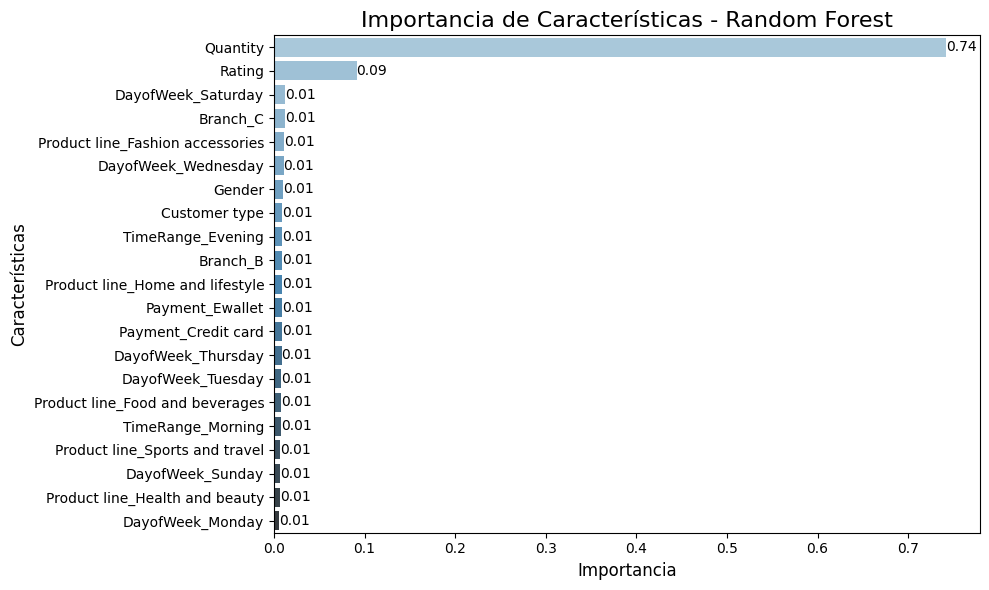

In [40]:
# Importancia de Características - Random Forest Optimizado
plt.figure(figsize=(10, 6))
importances_rf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=importances_rf, y=importances_rf.index, hue=importances_rf.index,
            palette="Blues_d", legend=False)
plt.title('Importancia de Características - Random Forest', fontsize=16)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)

# Añadir etiquetas a las barras
for i, val in enumerate(importances_rf):
    plt.text(val, i, f'{val:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Modelo Seleccionado:** Random Forest Optimizado.

Aunque Random Forest Optimizado y XGBoost Optimizado tienen métricas muy similares, la elección del modelo se baso en:
- **Facilidad de Interpretación:** Random Forest tiene una estructura más simple para analizar la importancia de características.
- **Velocidad de Entrenamiento:** Random Forest fue más rápido que XGBoost en el momento de ejecutar el código.
- Las métricas planteadas para la aceptación del modelo fueron confirmadas.

**Importancia de las variables en el modelo:**
- `Quantity`: Esta característica tiene una importancia significativamente alta (0.74), lo que indica que es la variable más relevante para predecir Log_Total.
- `Rating`: Con una importancia de 0.09, también contribuye de manera considerable a las predicciones, aunque en menor medida que `Quantity`.
- Las demás características tienen una importancia muy baja (0.01), lo que sugiere que su influencia en el modelo es casi insignificante.
- Aunque se logró predecir con precisión moderada, el modelo no captura toda la complejidad de las ventas totales. Esto puede deberse a la ausencia de otras variables clave, como promociones, precios dinámicos, comportamiento histórico de clientes, o eventos externos que afecten las ventas.

**Respuesta a la pregunta de negocio:**

**¿Se pueden predecir las ventas totales en función de las características del cliente y del entorno?**

Sí, es posible predecir las ventas totales, pero con una precisión moderada. Para mejorar las predicciones y hacerlas más útiles para el negocio, sería ideal incorporar más datos que reflejen otros factores que podrían impactar las ventas, como descuentos, estacionalidad o datos de inventario.